In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from numpy import array, cos, sin, deg2rad
from solarpy import solar_panel
from datetime import datetime, timedelta

Let us define a group of four panels arranged in this manner:

<img src="media/panel4.png" width="600">

So each panel is facing a cardinal direction with an inclination of 45 degrees. All of them will have a surface of 1 square meter and an efficieny of 0.3:

In [2]:
# panel instantiation
s = 1  # m2
eff = 0.3

sp1 = solar_panel(s, eff, 'East')
sp2 = solar_panel(s, eff, 'North')
sp3 = solar_panel(s, eff, 'West')
sp4 = solar_panel(s, eff, 'South')

# setting panel orientation in NED (north, east, down) frame
i = deg2rad(45)  # inclination angle (in radians)

sp1.set_orientation(array([0, cos(i), -sin(i)]))
sp2.set_orientation(array([cos(i), 0, -sin(i)]))
sp3.set_orientation(array([0, -cos(i), -sin(i)]))
sp4.set_orientation(array([-cos(i), 0, -sin(i)]))

The example will be set at a medium latitude and at sea-level on July 12:

In [3]:
lat, lng, h = 40, 0, 0
date = datetime(2019, 6, 12)  # Jul 12

list_sp = [sp1, sp2, sp3, sp4]

for spX in list_sp:
    spX.set_position(lat, lng, h)
    spX.set_datetime(date)

### Plotting time!

The power output of each panel will be plotted for the whole duration of the day (July 12), each 15 minutes:

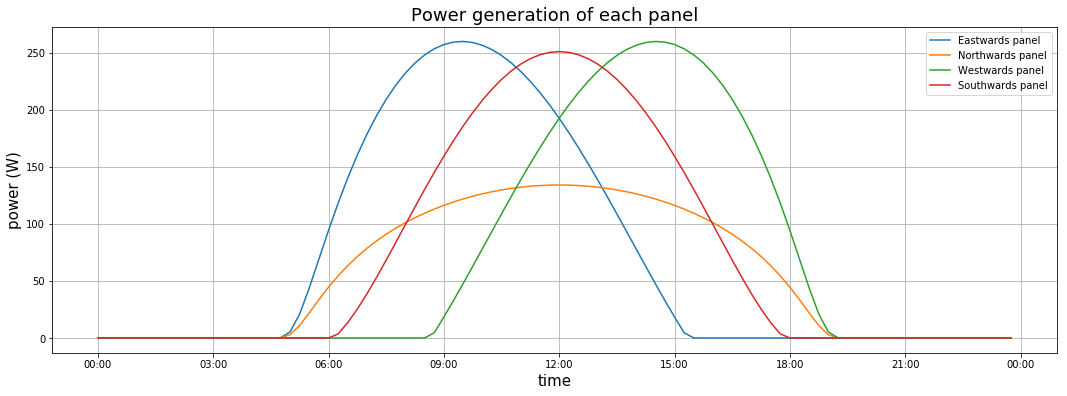

In [4]:
fig, ax = plt.subplots(figsize=(18, 6))

for spX in list_sp:
    t = [date + timedelta(minutes=i) for i in range(0, 15 * 24 * 4, 15)]  # each 15min

    power = []
    for i in t:
        spX.set_datetime(i)
        power.append(spX.power())
    
    ax.plot(t, power, label=spX.id_name + 'wards panel')
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
    
plt.xlabel('time', fontsize=15)
plt.ylabel('power (W)', fontsize=15)
plt.title('Power generation of each panel', fontsize=18)
plt.legend()
plt.grid(True)